# **Importing Libraries & Dataset**

### **Importing Libraries:**

In [ ]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### **Importing Dataset:**

In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# **Exploratory Data Analysis**

### **Basic Observations:**

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Missing Values Heatmap')

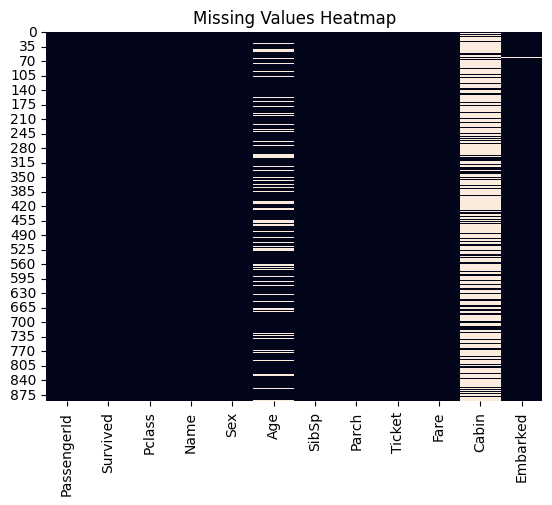

In [ ]:
train_df.isnull().sum()
sns.heatmap(train_df.isnull(), cbar = False).set_title("Missing Values Heatmap")

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> **Conclusion**

- **Numerical** - Age, Fare, PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch, Embarked
- **Mixed** - Name, Ticket, Cabin

## **Univariate Data Analysis:**

### **Numerical Features - Age, Fare**

**1. Age**

In [ ]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

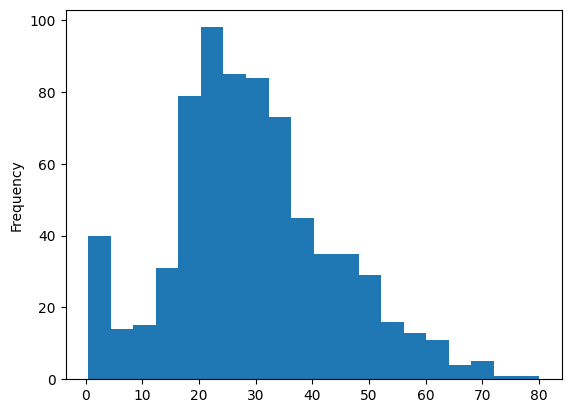

In [ ]:
train_df['Age'].plot(kind='hist',bins=20)

In [ ]:
train_df['Age'].isnull().sum()

177

**Conclusion:**

- The youngest traveler onboard was aged around two months and the oldest traveler was 80 years.
- The average age of tourists onboard was just under 30 years.
- In Age 20% of the values are missing.

**1. Fare**

In [ ]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

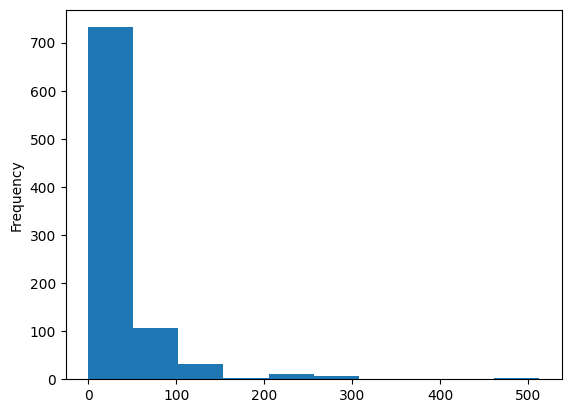

In [ ]:
train_df['Fare'].plot(kind='hist')

In [ ]:
train_df['Fare'].isnull().sum()

0

**Conclusion:**

- Fare feature actually contains the group fare and not the individual fare (This migth be and issue).
- We need to create a new feature called individual_fare.

### **Categorical Features - Survived, Pclass, Sex, SibSp, Parch, Embarked**

**1. Survived**

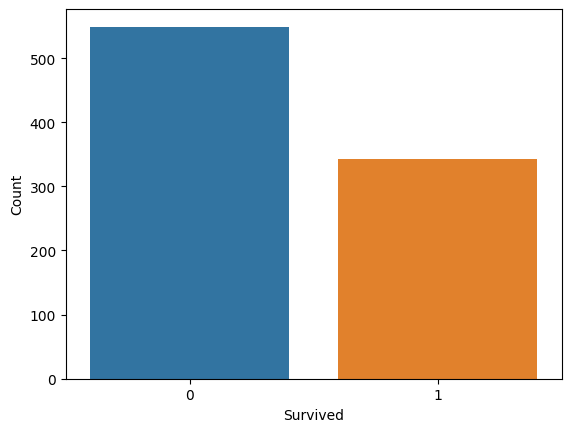

In [ ]:
sns.countplot(data=train_df, x='Survived')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [ ]:
death_percent = round((train_df['Survived'].value_counts().values[0]/891)*100)
survived_percent = round((train_df['Survived'].value_counts().values[1]/891)*100)

print("Died     : {}%".format(death_percent))
print("Survived : {}%".format(survived_percent))

Died     : 62%
Survived : 38%


**Conclusion:**

- Here, 62% people died in the accident.
- Here, 38% people survived in the accident.
- This feature does not have any missing values.

**2. Pclass**

Text(0, 0.5, 'Count')

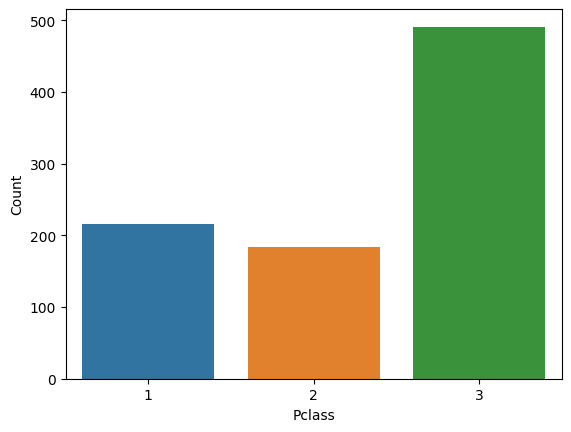

In [ ]:
sns.countplot(data=train_df, x='Pclass')

plt.xlabel('Pclass')
plt.ylabel('Count')

**Conclusion:**

- Here, Most of the passengers were travelled from Class-3, after that Class-1, and Class-2.
- This feature does not have any missing values.

**3. Sex**

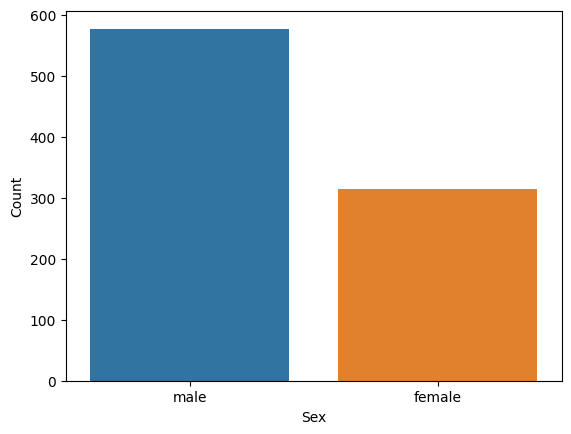

In [ ]:
sns.countplot(data=train_df, x='Sex')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
male = round((train_df['Sex'].value_counts().values[0]/891)*100)
female = round((train_df['Sex'].value_counts().values[1]/891)*100)

print("Male   :{}%".format(male))
print("Female :{}%".format(female))

Male   :65%
Female :35%


**Conclusion:**

- Here, 65% passengers are male and 35% passengers are female.

**4. SibSp**

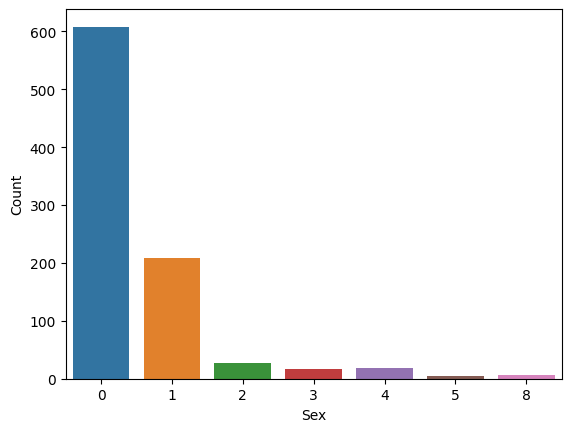

In [ ]:
sns.countplot(data=train_df, x='SibSp')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
print(train_df['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


**Conclusion:**

-  A maximum of 8 siblings and spouses traveled along with one of the traveler. More than 90% of people traveled alone or with one of their sibling or spouse.
- This feature does not have any missing values.

**5. Parch**

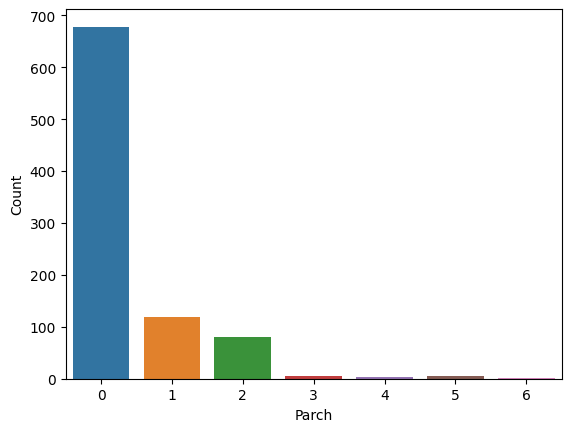

In [ ]:
sns.countplot(data=train_df, x='Parch')

plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

In [ ]:
print((train_df['Parch'].value_counts()/891)*100)

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


**Conclusion:**

-  This feature contained the number of parents or children each passenger was touring with. A maximum of 76% passengers travelled with no parents or child.
- This feature does not have any missing values.

**6. Embarked**

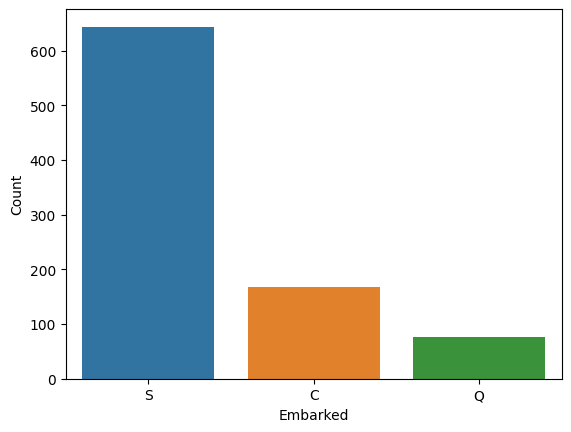

In [ ]:
sns.countplot(data=train_df, x='Embarked')

plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [ ]:
print((train_df['Embarked'].value_counts()/891)*100)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


In [ ]:
train_df['Embarked'].isnull().sum()

2

**Conclusion:**

- Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

- More than 72% of the people boarded from Southampton.

- Just under 28% boarded from Cherbourg and the rest boarded from Queenstown.

- This feature is having 2 missing values.

## **Multivariate Data Analysis:**

**1. Pclass with Fare**

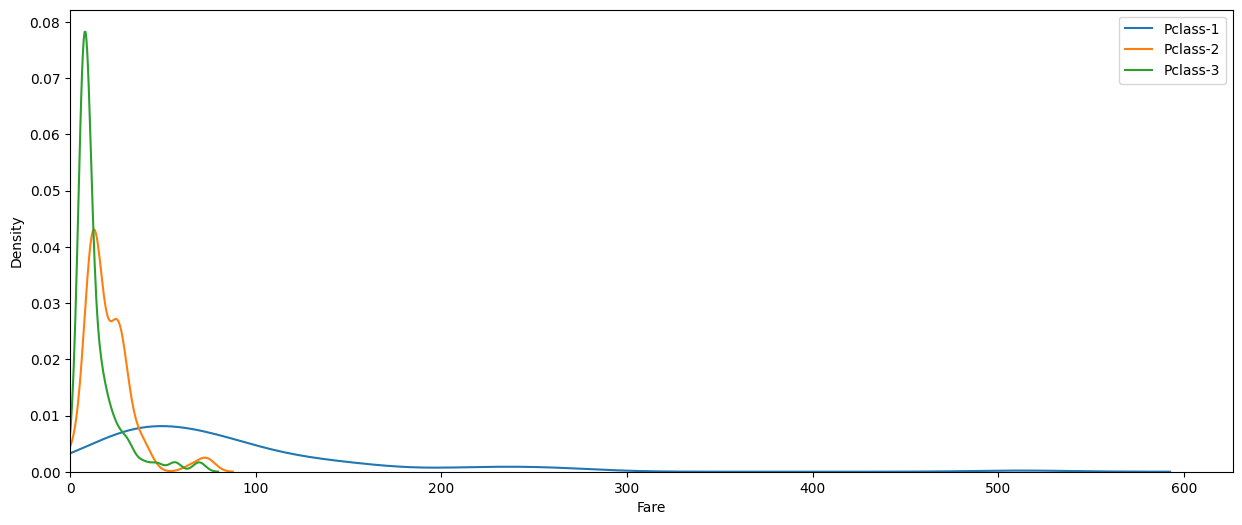

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(train_df[train_df['Pclass'] == 1]['Fare'], label='Pclass-1')
sns.kdeplot(train_df[train_df['Pclass'] == 2]['Fare'], label='Pclass-2')
sns.kdeplot(train_df[train_df['Pclass'] == 3]['Fare'], label='Pclass-3')
plt.xlim(0)
plt.legend(loc='upper right')
plt.show()

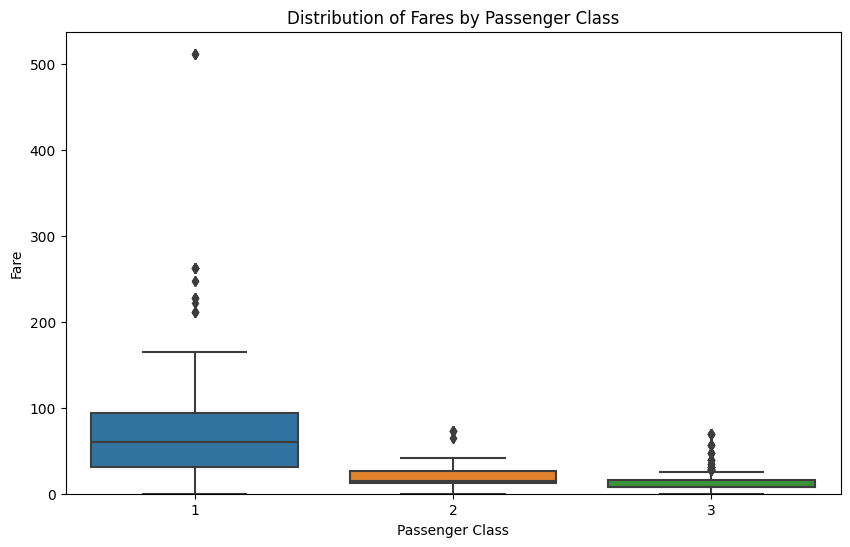

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.ylim(0)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Distribution of Fares by Passenger Class')
plt.show()

**Conclusion:**
- From the above visuals it is proved that the Pclass-1 is more costlier, then Pclass-2, and Pclass-3.
- As the Outliers are present in the fare for the Pclass-1 and Pclass-2, But we should keep in mind that this is the fare of entire family, this is not an individual fare.
- To deal with this outliers i will create the new feature called individual_fare which resolves the overall problem.

**2. Survived with Pclass**

<Axes: xlabel='Survived', ylabel='count'>

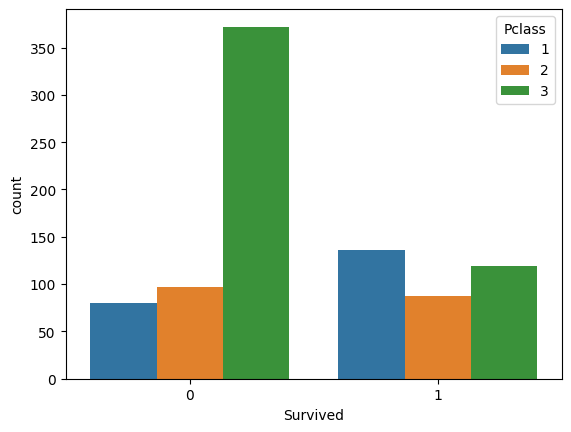

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Pclass'])

**Conclusion:**

- The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler.

**3. Survived with Sex**

<Axes: xlabel='Survived', ylabel='count'>

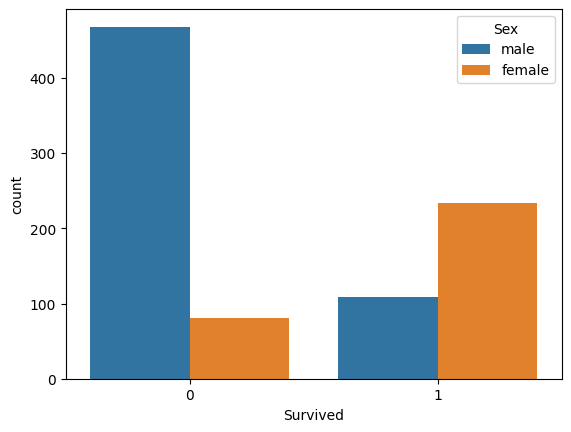

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Sex'])

**Conclusion:**

- Approximately 65% of the passengers were male while the remaining 35% were female.
- Most of the male passengers died, as compared to female passengers.



**4. Survived with Embarked**

<Axes: xlabel='Survived', ylabel='count'>

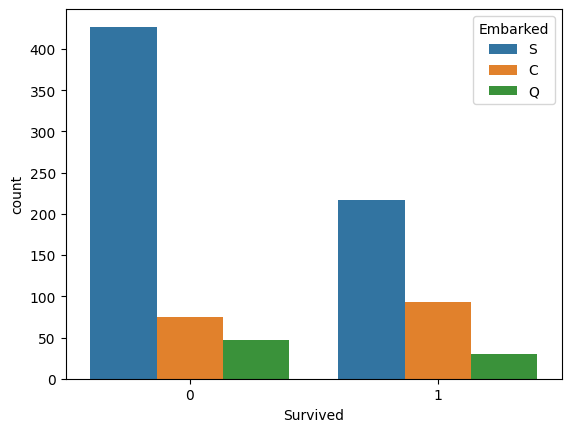

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Embarked'])

**Conclusion:**

- Passengers who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

**5. Survived with Age**

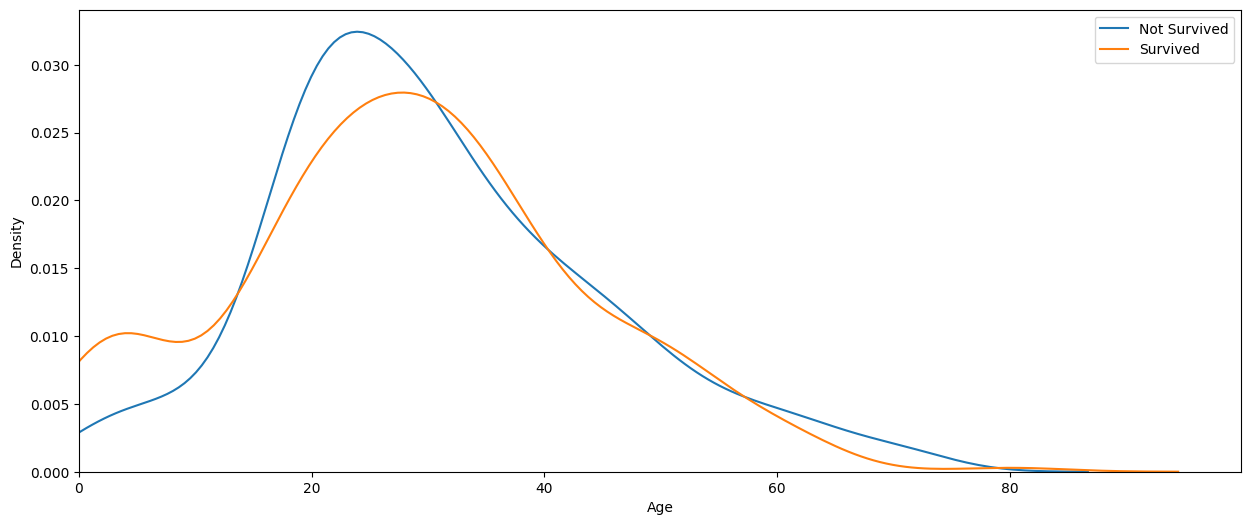

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], label='Not Survived')
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], label='Survived')
plt.xlim(0)
plt.legend(loc='upper right')
plt.show()

**Conclusion:**

- Clearly, a larger fraction of children under 10 survived than died.
- Passengers belongs to age range 18 to 30 are not survived.
- Few Passenger of age above 80 are survived.

**6. Survived with Fare**

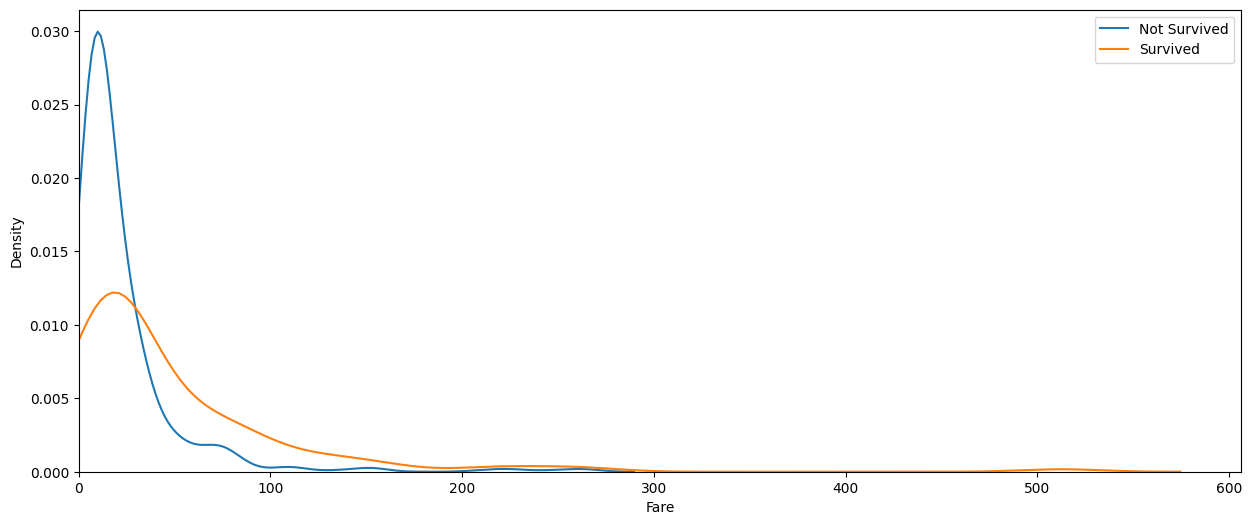

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(train_df[train_df['Survived'] == 0]['Fare'], label='Not Survived')
sns.kdeplot(train_df[train_df['Survived'] == 1]['Fare'], label='Survived')
plt.xlim(0)
plt.legend(loc='upper right')
plt.show()

**Conclusion:**
- It was obvious that there was a strong association between the charge and the survival. The higher a passengers paid, the higher would be his chances to survive.

**7. Survived with Age and Sex**

<ipython-input-33-b3be94d70d31>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=ax, kde=False)
<ipython-input-33-b3be94d70d31>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Survived'] == 0].Age.dropna(

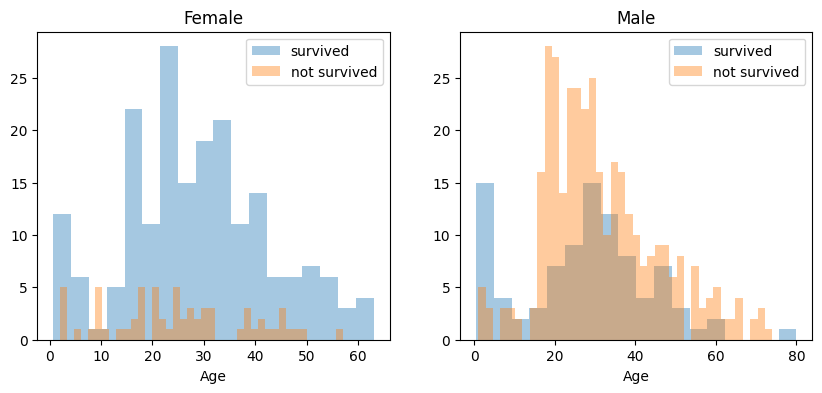

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for gender, ax in zip(['female', 'male'], axes):
    data = train_df[train_df['Sex'] == gender]

    ax = sns.distplot(data[data['Survived'] == 1].Age.dropna(), bins=18, label=survived, ax=ax, kde=False)
    ax = sns.distplot(data[data['Survived'] == 0].Age.dropna(), bins=40, label=not_survived, ax=ax, kde=False)
    ax.legend()
    ax.set_title('Female' if gender == 'female' else 'Male')

**Conclusion:**

- Men between 18 and 30 have a good chance of survival, although women also have some likelihood but not as much. Women have higher survival chances between 14 and 40.

- Men have a low chance of survival between ages 5 and 18, but this doesn't apply to women. Additionally, infants also have slightly better survival odds.

**8. Survived with Embarked, Pclass, Sex**

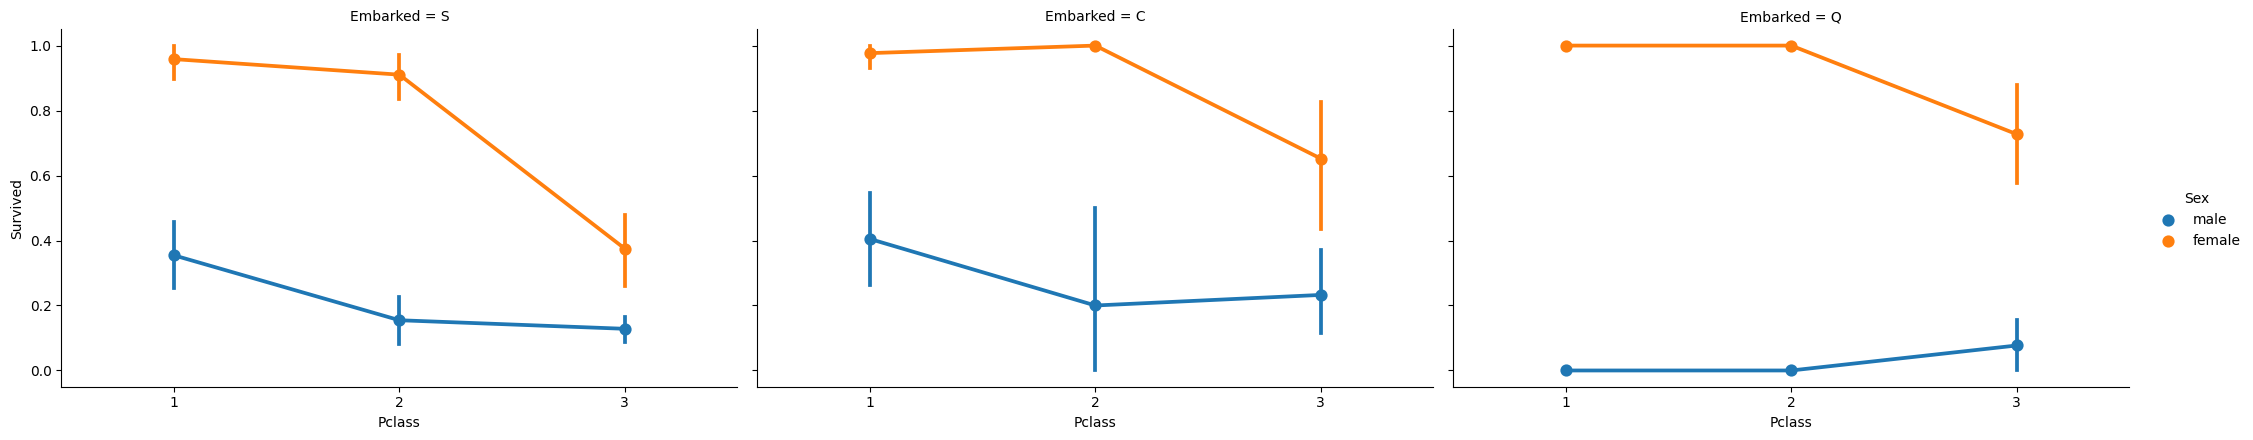

In [ ]:
sns.catplot(data=train_df, x='Pclass', y='Survived', hue='Sex', kind='point', col='Embarked', height=4.5, aspect=1.6, palette=None, order=None, hue_order=None)

**Conclusion:**

- Embarked seems to be correlated with survival, depending on the gender.
- Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C.
-Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

**8. Survived with Embarked, Pclass, Sex**

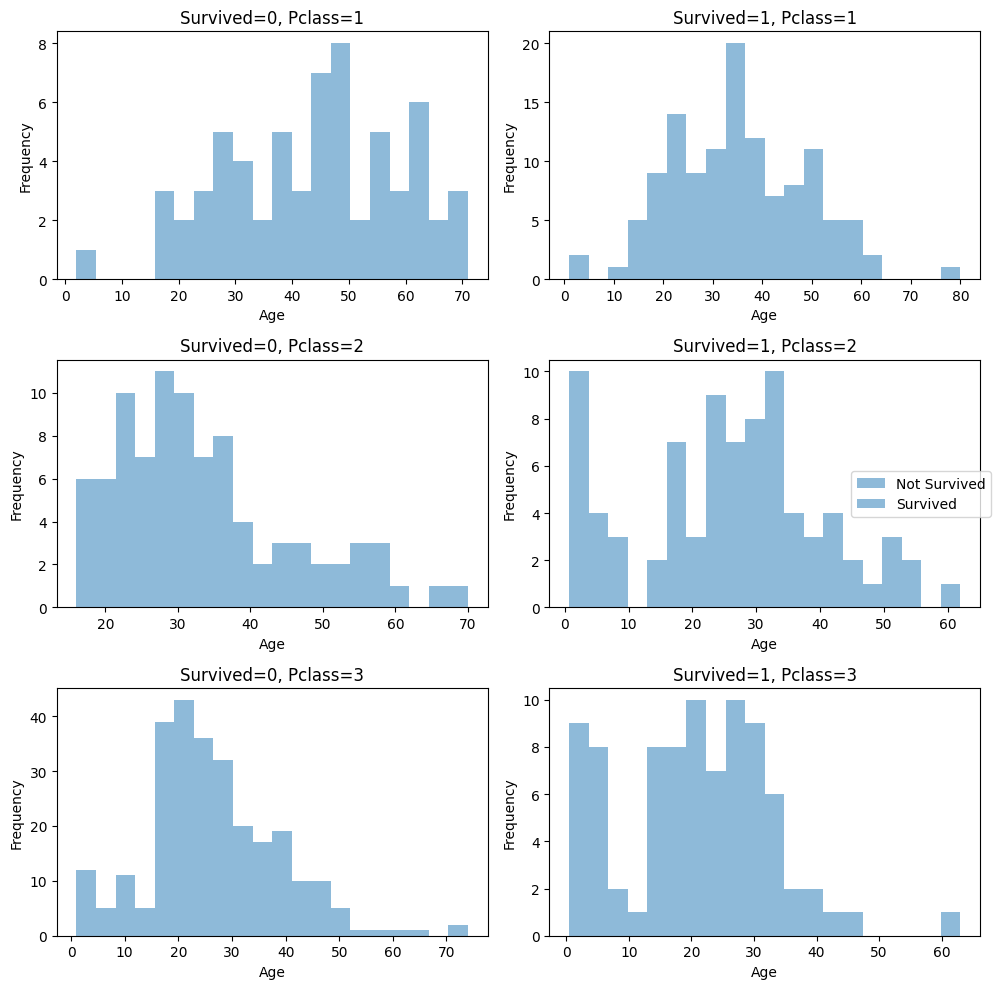

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

for i, survived in enumerate([0, 1]):
    for j, pclass in enumerate([1, 2, 3]):
        data = train_df[(train_df['Survived'] == survived) & (train_df['Pclass'] == pclass)]
        axes[j, i].hist(data['Age'], alpha=0.5, bins=20)
        axes[j, i].set_title(f'Survived={survived}, Pclass={pclass}')
        axes[j, i].set_xlabel('Age')
        axes[j, i].set_ylabel('Frequency')

fig.legend(['Not Survived', 'Survived'], loc='center right')
fig.tight_layout()
plt.show()

**Conclusion:**

- The plot above validates our initial assumption regarding pclass 1, supporting the notion that individuals in this class have a higher likelihood of survival.
- Additionally, it reveals a notable probability that individuals in pclass 3 will not survive.

# **Data Preprocessing**

### **Handling Missing Values:**

Now I will handle the issue of missing values in the following features: **Age-177**, **Cabin-687**, **Embarked-2**

> **1. Age**

Now let's handle the issue of missing values in the age feature. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.

The advantage of this method is that it fills the missing values in the "Age" column with random numbers generated based on the mean, standard deviation, and number of missing values.


In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

print("Count Of Missing Values - Age : ", train_df["Age"].isnull().sum())

Count Of Missing Values - Age :  0


Let's visualize the **Survival** feature with the **Age** feature.

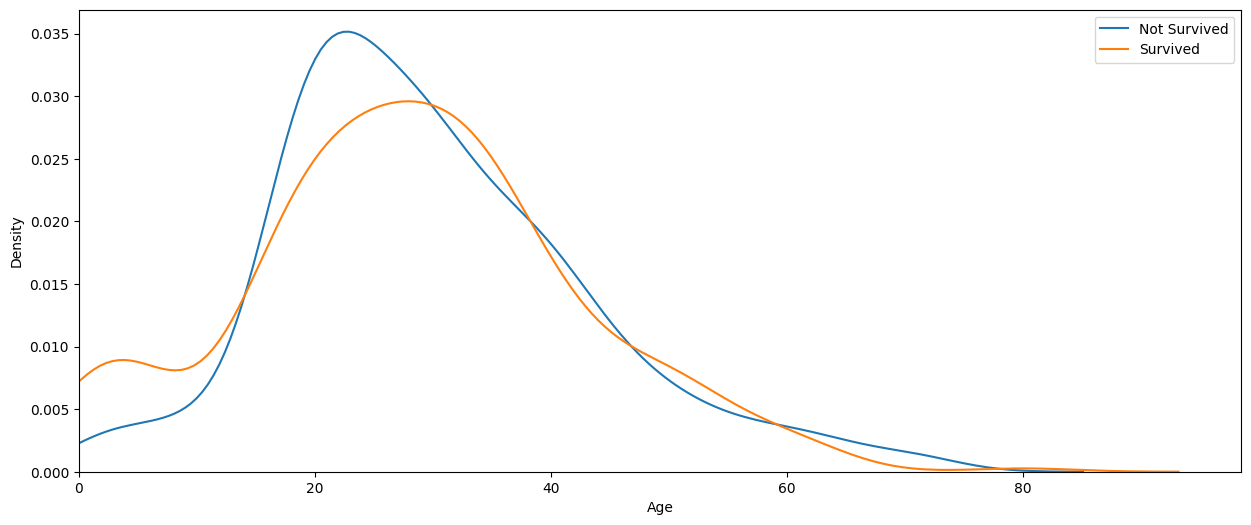

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(train_df[train_df['Survived'] == 0]['Age'], label='Not Survived')
sns.kdeplot(train_df[train_df['Survived'] == 1]['Age'], label='Survived')
plt.xlim(0)
plt.legend(loc='upper right')
plt.show()

This approach introduces some randomness to the imputation process, which can help to better preserve the statistical properties of the age distribution.

> **2. Cabin**

Initially, I considered removing the 'Cabin' feature, but then I discovered something interesting. The cabin number follows a pattern like 'C123', where the letter represents the deck. So, we will extract this information and create a new feature to indicate the deck where a person's cabin was located.

Any missing values will be replaced with U. The picture below shows the decks of the Titanic, labeled from A to G.

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

print("Count Of Missing Values - Deck : ", train_df["Deck"].isnull().sum())

Count Of Missing Values - Deck :  0


Let's visualize the **Survival** feature with the **Deck** feature.

<Axes: xlabel='Survived', ylabel='count'>

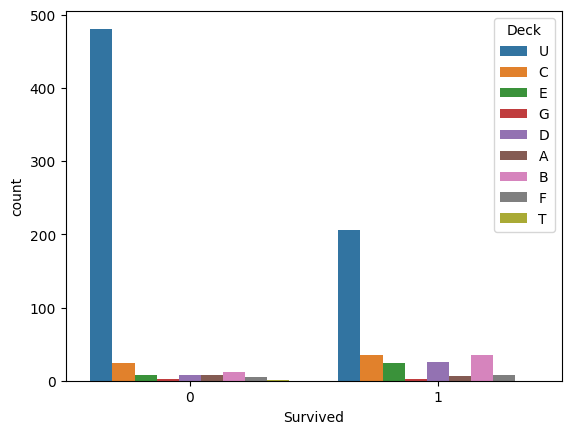

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Deck'])

> **3. Embarked**

Since there are only 2 missing values in the Embarked feature, we can simply fill them with the most common value.

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

print("Count Of Missing Values - Embarked : ", train_df["Embarked"].isnull().sum())

Count Of Missing Values - Embarked :  0


Let's visualize the **Survival** feature with the **Embarked** feature.

<Axes: xlabel='Survived', ylabel='count'>

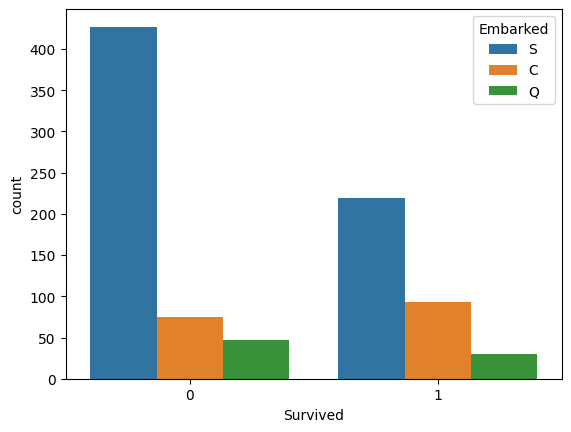

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Embarked'])

### **Removing Features:**

> **PassengerId**

I will remove the 'PassengerId' from the training set because it does not contribute to a person's survival probability. However, I will keep it in the test set since it is required for submission purposes.

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

> **Ticket**

I will remove the 'Ticket' from both training set and testing set because it does not contribute to a person's survival probability.

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

# **Feature Engineering**

### **Creating New Features:**

I will add few new features to the dataset, that I compute out of other features.

> **1. Title**

For the 'Name' feature, we will extract the titles from the names in order to create a new feature based on that information.

In [ ]:
data = [train_df, test_df]
# titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset["Title"].value_counts()


for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset["Title"].value_counts()

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Let's visualize the **Survival** feature with the **Title** feature.

<Axes: xlabel='Survived', ylabel='count'>

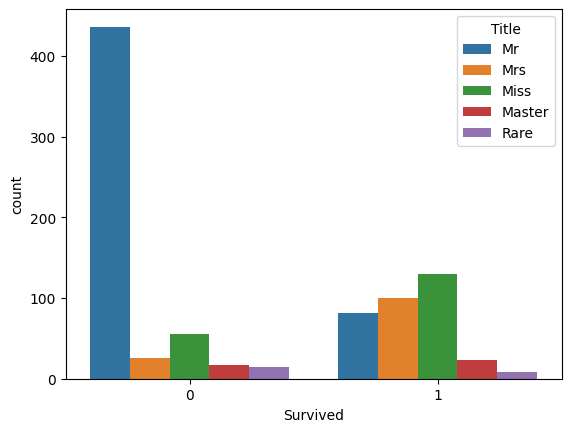

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['Title'])

Hence, From the above visual we can conclude that survival probability of a passenger also depends on the initial of passengers name.

> **2. Family Size**


In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['family_members'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset.loc[dataset["family_members"] == 1, "family_size"] = 'singleton'
    dataset.loc[(dataset["family_members"] > 1)  &  (dataset["family_members"] < 5) , "family_size"] = 'small'
    dataset.loc[dataset["family_members"] > 4, "family_size"] = 'large'

In [ ]:
print(train_df["family_members"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_members, dtype: int64


Let's visualize the **Survival** feature with the **family_size** feature.

<Axes: xlabel='Survived', ylabel='count'>

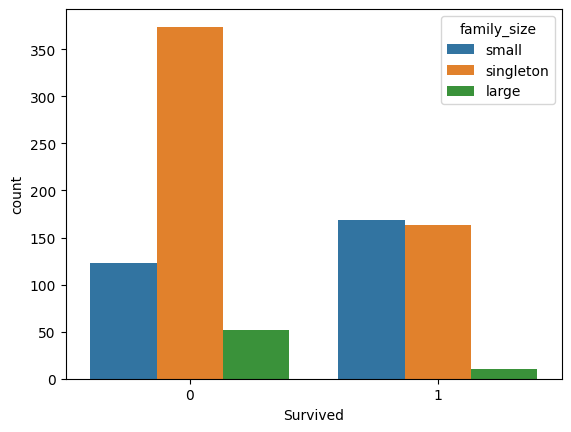

In [ ]:
sns.countplot(x=train_df['Survived'], hue=train_df['family_size'])

Hence, From the above visual we can conclude that survival probability of a passenger also depends on the passengers family size.

Passengers having small families will have the higher chance of survival.

> **3. Individual Fare**


In [ ]:
for dataset in data:
    dataset['individual_fare'] = dataset['Fare'] / dataset['family_members']
    dataset['individual_fare'] = dataset['individual_fare'].fillna(0)
    dataset['individual_fare'] = dataset['individual_fare'].replace([np.inf, -np.inf], 0)
    dataset['individual_fare'] = dataset['individual_fare'].astype(int)

Let's visualize the **Survival** feature with the **individual_fare** feature.

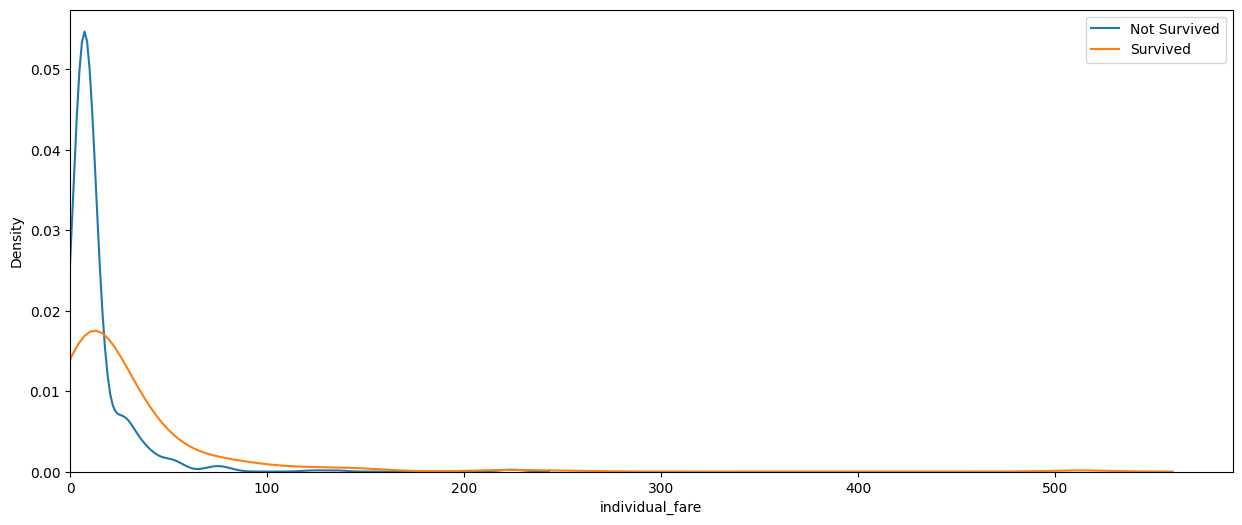

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(train_df[train_df['Survived'] == 0]['individual_fare'], label='Not Survived')
sns.kdeplot(train_df[train_df['Survived'] == 1]['individual_fare'], label='Survived')
plt.xlim(0)
plt.legend(loc='upper right')
plt.show()

In [ ]:
train_df['individual_fare'] < 0

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: individual_fare, Length: 891, dtype: bool

Hence, From the above visuals we conclude that, The higher a passengers paid, the higher would be his chances to survive.

### **Converting Features:**

Here, We have to deal with 5 categorical columns such as **Sex**, **Embarked**, **Deck**, **Title**, **family_size** Lets investigate and transfrom them.

In [ ]:
data = [train_df, test_df]
columns_to_encode = ['Sex', 'Embarked', 'Deck', 'Title', 'family_size']
label_encoder = LabelEncoder()

for dataset in data:
    for column in columns_to_encode:
        dataset[column] = label_encoder.fit_transform(dataset[column])

**Let's take a last look at the training set, before we start training the models.**

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,family_members,family_size,individual_fare
0,0,3,1,22,1,0,7.2500,2,8,2,2,2,3
1,1,1,0,38,1,0,71.2833,0,2,3,2,2,35
2,1,3,0,26,0,0,7.9250,2,8,1,1,1,7
3,1,1,0,35,1,0,53.1000,2,2,3,2,2,26
4,0,3,1,35,0,0,8.0500,2,8,2,1,1,8


# **Model Training**

### **Dataset Splitting:**

Now, I will train multiple Machine Learning models and compare their results. Since the dataset does not provide labels for the testing set, we will use the entire train_df and split this into X_train, X_test, y_train, y_test respectively.

In [ ]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### **Logistic Regression:**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **K Nearest Neighbor:**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### **Linear Support Vector Machine:**

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### **Decision Tree:**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

### **Random Forest:**

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### **XGBoost Classifier:**

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

### **Comparing Models:**

Now, I will compare the different models based on their Evaluation Metrics.

> **Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models = {
    'Logistic Regression': (y_pred_lr, confusion_matrix(y_test, y_pred_lr)),
    'KNN': (y_pred_knn, confusion_matrix(y_test, y_pred_knn)),
    'SVM': (y_pred_svc, confusion_matrix(y_test, y_pred_svc)),
    'Decision Tree': (y_pred_dt, confusion_matrix(y_test, y_pred_dt)),
    'Random Forest': (y_pred_rf, confusion_matrix(y_test, y_pred_rf)),
    'XGBoost Classifier': (y_pred_xgb, confusion_matrix(y_test, y_pred_xgb)),
}

print("Confusion Matrices - \n")

for model_name, (y_pred, confusion_matrix) in models.items():
    print(f"{model_name}:")
    print(confusion_matrix)
    print()

Confusion Matrices - 

Logistic Regression:
[[98 14]
 [21 46]]

KNN:
[[92 20]
 [29 38]]

SVM:
[[71 41]
 [11 56]]

Decision Tree:
[[90 22]
 [21 46]]

Random Forest:
[[94 18]
 [18 49]]

XGBoost Classifier:
[[96 16]
 [19 48]]



> **Accuracy Score, Precision Score, Recall Score, F1-Score**

In [ ]:
models = ['Logistic Regression', 'K Nearest Neighbor', 'Linear SVM', 'Decision Tree', 'Random Forest', 'XGBoost Classifier']
predictions = [y_pred_lr, y_pred_knn, y_pred_svc, y_pred_dt, y_pred_rf, y_pred_xgb]

metrics = {
    'Model': models,
    'Accuracy': [accuracy_score(y_test, pred) for pred in predictions],
    'Precision': [precision_score(y_test, pred) for pred in predictions],
    'Recall': [recall_score(y_test, pred) for pred in predictions],
    'F1 Score': [f1_score(y_test, pred) for pred in predictions]
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804469   0.766667  0.686567  0.724409
1   K Nearest Neighbor  0.726257   0.655172  0.567164  0.608000
2           Linear SVM  0.709497   0.577320  0.835821  0.682927
3        Decision Tree  0.759777   0.676471  0.686567  0.681481
4        Random Forest  0.798883   0.731343  0.731343  0.731343
5   XGBoost Classifier  0.804469   0.750000  0.716418  0.732824


### **Best Model:**

Based on the current results, the **Random Forest Classifier** is performing well.

In [ ]:
print("Random Forest Classifier:")
print("Accuracy   :", accuracy_score(y_test, y_pred_rf),)
print("Precision  :", precision_score(y_test, y_pred_rf))
print("Recall     :", recall_score(y_test, y_pred_rf))
print("F1 Score   :", f1_score(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy   : 0.7988826815642458
Precision  : 0.7313432835820896
Recall     : 0.7313432835820896
F1 Score   : 0.7313432835820896


# **Hyperparameter Tunning**

### **Model Tunning:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

param_grid = {
    'criterion' : ["gini", "entropy"],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

### **Best Parameters:**

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score:  0.8300699300699301


### **Model Training**

In [ ]:
rf_clf_titanic = RandomForestClassifier(criterion = "gini",
                                       max_depth = None,
                                       min_samples_split = 10,
                                       n_estimators = 200)

rf_clf_titanic.fit(X_train, y_train)
y_pred_final = rf_clf_titanic.predict(X_test)

# **Model Evaluation**

In [ ]:
print("Random Forest Classifier:")
print("Accuracy   :", accuracy_score(y_test, y_pred_final),)
print("Precision  :", precision_score(y_test, y_pred_final))
print("Recall     :", recall_score(y_test, y_pred_final))
print("F1 Score   :", f1_score(y_test, y_pred_final))

Random Forest Classifier:
Accuracy   : 0.8435754189944135
Precision  : 0.8305084745762712
Recall     : 0.7313432835820896
F1 Score   : 0.7777777777777778


# **Pickling ML Model**

In [ ]:
import pickle

with open('rf_clf_titanic.pkl', 'wb') as file:
    pickle.dump(rf_clf_titanic, file)
